# Multi Linear Regression - Inventory Optimisation

## 1 Import Libraries and Data

Pada studi kasus analisis regresi linier berganda akan digunakan data dengan lima variabel independen (X) current_wholesale_price, start_of_day, quantity_sold, waste, dan current_retail_price_value, sedangkan variabel dependen (Y) waste_percentage, dengan detail variabel seperti berikut :

- current_wholesale_price	= harga grosir
- start_of_day	= target penjualan produk
- quantity_sold	= jumlah produk terjual
- waste	= jumlah produk tersisa
- current_retail_price_value	= harga jual
- waste_percentage	= persentase produk tersisa

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path = "/content/gdrive/My Drive/DataFiles/ml_regresi_linear/Data/"

In [4]:
os.listdir(path)

['Inventory Coffee Shop Clean.csv',
 'Total Transaksi Customer Coffee Shop Clean.csv']

In [5]:
data = pd.read_csv(path + 'Inventory Coffee Shop Clean.csv')

In [6]:
data

,Unnamed: 0,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste,current_retail_price_value,waste_percentage,sold_value,target_trx,waste_value
0,0,2019-04-01,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,$3.50,18,8,10,56%,3.50,56,28.00,63.0,35.00
1,1,2019-04-01,32-20 Broadway,Long Island City,Cranberry Scone,2.11,$3.25,18,12,6,33%,3.25,33,39.00,58.5,19.50
2,2,2019-04-01,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,$3.75,18,8,10,56%,3.75,56,30.00,67.5,37.50
3,3,2019-04-01,32-20 Broadway,Long Island City,Ginger Scone,2.11,$3.25,48,9,39,81%,3.25,81,29.25,156.0,126.75
4,4,2019-04-01,32-20 Broadway,Long Island City,Almond Croissant,2.44,$3.75,18,9,9,50%,3.75,50,33.75,67.5,33.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,302,2019-04-27,687 9th Avenue,New York,Hazelnut Biscotti,2.28,$3.50,18,1,17,94%,3.50,94,3.50,63.0,59.50
303,303,2019-04-27,687 9th Avenue,New York,Cranberry Scone,2.11,$3.25,18,4,14,78%,3.25,78,13.00,58.5,45.50
304,304,2019-04-27,687 9th Avenue,New York,Chocolate Croissant,2.44,$3.75,18,2,16,89%,3.75,89,7.50,67.5,60.00
305,305,2019-04-27,687 9th Avenue,New York,Ginger Scone,2.11,$3.25,48,19,29,60%,3.25,60,61.75,156.0,94.25


In [7]:
data = data.drop(['Unnamed: 0', 'current_retail_price', '% waste'], axis=1)

In [8]:
data.head(5)

,transaction_date,store_address,store_city,product,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage,sold_value,target_trx,waste_value
0,2019-04-01,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,18,8,10,3.50,56,28.00,63.0,35.00
1,2019-04-01,32-20 Broadway,Long Island City,Cranberry Scone,2.11,18,12,6,3.25,33,39.00,58.5,19.50
2,2019-04-01,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,18,8,10,3.75,56,30.00,67.5,37.50
3,2019-04-01,32-20 Broadway,Long Island City,Ginger Scone,2.11,48,9,39,3.25,81,29.25,156.0,126.75
4,2019-04-01,32-20 Broadway,Long Island City,Almond Croissant,2.44,18,9,9,3.75,50,33.75,67.5,33.75


In [9]:
data_filter = data.drop(['transaction_date', 'store_address', 'store_city', 'product', 'sold_value', 'target_trx', 'waste_value'], axis=1)

In [10]:
data_filter.head(5)

,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage
0,2.28,18,8,10,3.50,56
1,2.11,18,12,6,3.25,33
2,2.44,18,8,10,3.75,56
3,2.11,48,9,39,3.25,81
4,2.44,18,9,9,3.75,50


## 2 Exploratory Data Analysis (EDA) & Data Pre-Processing

### Summary Data

In [11]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   current_wholesale_price     307 non-null    float64
 1   start_of_day                307 non-null    int64  
 2   quantity_sold               307 non-null    int64  
 3   waste                       307 non-null    int64  
 4   current_retail_price_value  307 non-null    float64
 5   waste_percentage            307 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 14.5 KB


In [12]:
data_filter.describe()

,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,2.274951,24.058632,9.296417,14.657980,3.498371,58.107492
std,0.147357,12.063414,5.440115,11.202108,0.223235,20.859431
min,2.110000,18.000000,0.000000,0.000000,3.250000,0.000000
25%,2.110000,18.000000,6.000000,8.000000,3.250000,44.000000
50%,2.280000,18.000000,8.000000,11.000000,3.500000,58.000000
75%,2.440000,18.000000,11.000000,15.000000,3.750000,72.000000
max,2.440000,48.000000,32.000000,47.000000,3.750000,96.000000


### Missing Value

Missing value adalah data yang hilang, atau nilai yang hilang, terjadi ketika tidak ada nilai data yang disimpan untuk variabel dalam pengamatan. Kita ingin melakukan identifikasi, apakah terdapat data yang missing atau tidak dalam observasi pengamatan.

In [13]:
data_filter.isna().sum()

current_wholesale_price       0
start_of_day                  0
quantity_sold                 0
waste                         0
current_retail_price_value    0
waste_percentage              0
dtype: int64

### Duplicated Data

Melakukan identifikasi, apakah terdapat data/observasi yang sama atau tidak, apabila ada data yang terduplikasi maka data duplikasi harus dihapus.

In [14]:
data_filter[data_filter.duplicated()]

,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage
9,2.44,18,9,9,3.75,50
10,2.28,18,8,10,3.50,56
13,2.11,48,9,39,3.25,81
17,2.44,18,10,8,3.75,44
18,2.11,48,10,38,3.25,79
...,...,...,...,...,...,...
299,2.44,18,7,11,3.75,61
300,2.11,48,18,30,3.25,63
301,2.44,18,7,11,3.75,61
303,2.11,18,4,14,3.25,78


In [17]:
#drop duplikasi data
data_filter.drop_duplicates(inplace=True)

In [18]:
data_filter

,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage
0,2.28,18,8,10,3.50,56
1,2.11,18,12,6,3.25,33
2,2.44,18,8,10,3.75,56
3,2.11,48,9,39,3.25,81
4,2.44,18,9,9,3.75,50
...,...,...,...,...,...,...
275,2.11,48,31,17,3.25,58
277,2.28,18,16,2,3.50,11
302,2.28,18,1,17,3.50,94
304,2.44,18,2,16,3.75,89


### Uji Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

#### Uji Nomalitas Data

In [20]:
#used features
#current_wholesale_price, start_of_day,	quantity_sold,	waste,	current_retail_price_value,	waste_percentage

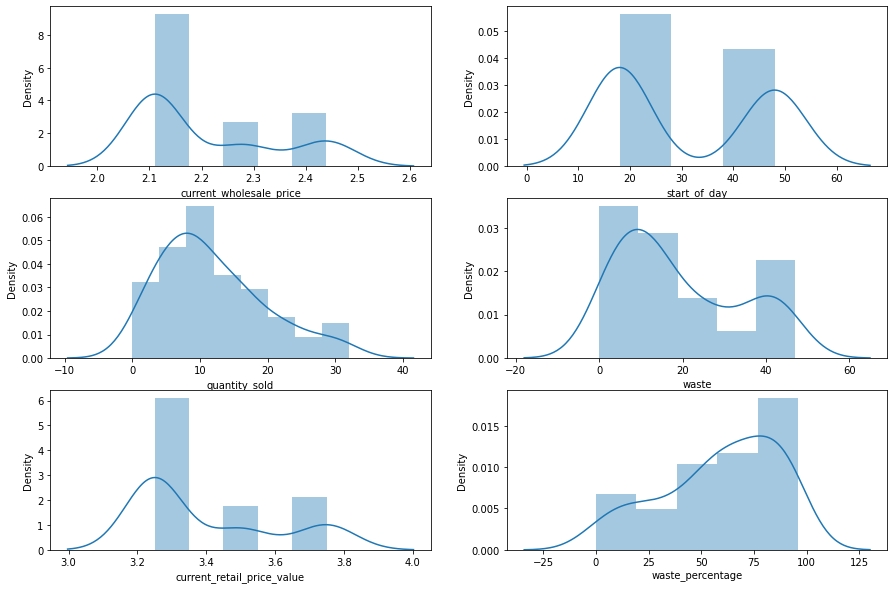

In [21]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

sns.distplot(data_filter['current_wholesale_price'], ax=axes[0, 0])
sns.distplot(data_filter['start_of_day'], ax=axes[0, 1])
sns.distplot(data_filter['quantity_sold'], ax=axes[1, 0])
sns.distplot(data_filter['waste'], ax=axes[1, 1])
sns.distplot(data_filter['current_retail_price_value'], ax=axes[2, 0])
sns.distplot(data_filter['waste_percentage'], ax=axes[2, 1])
plt.show()

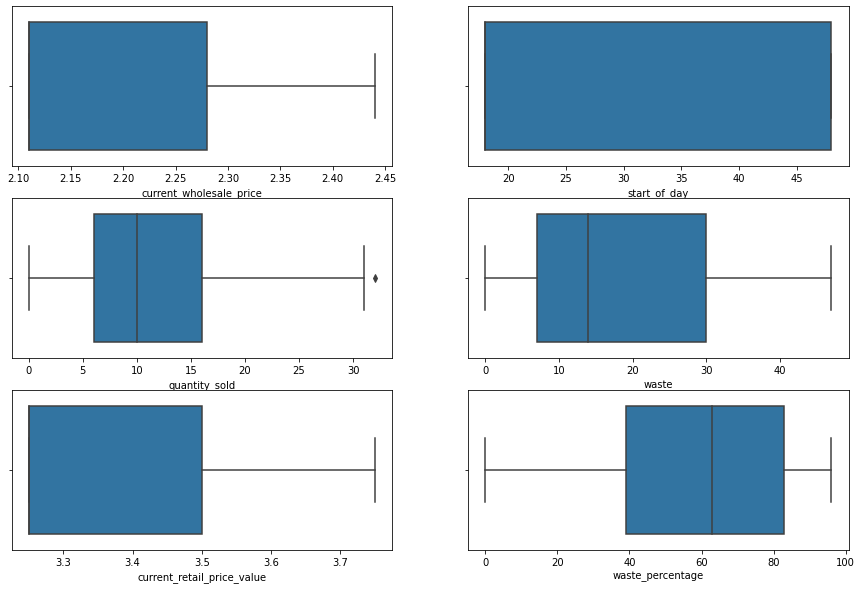

In [22]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

sns.boxplot(data_filter['current_wholesale_price'], ax=axes[0, 0])
sns.boxplot(data_filter['start_of_day'], ax=axes[0, 1])
sns.boxplot(data_filter['quantity_sold'], ax=axes[1, 0])
sns.boxplot(data_filter['waste'], ax=axes[1, 1])
sns.boxplot(data_filter['current_retail_price_value'], ax=axes[2, 0])
sns.boxplot(data_filter['waste_percentage'], ax=axes[2, 1])
plt.show()

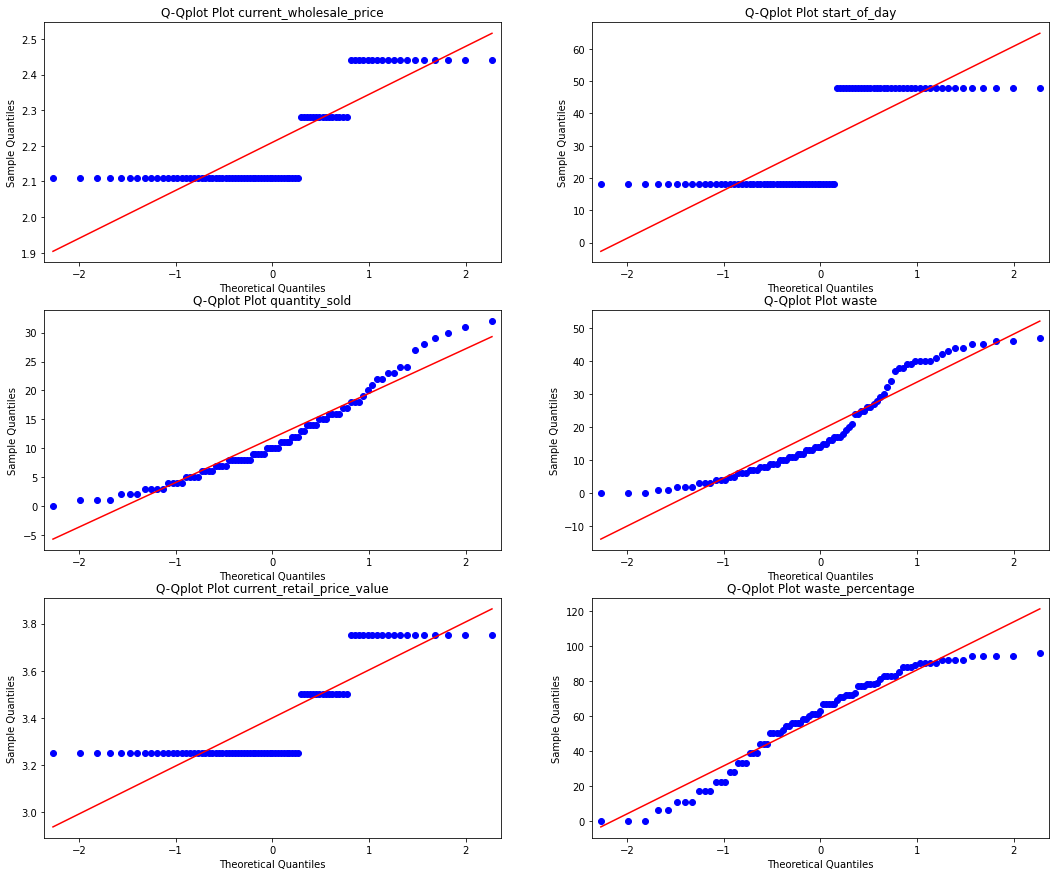

In [23]:
# Cek normalitas data dengan Q-Q plot
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

sm.graphics.qqplot(data_filter['current_wholesale_price'].dropna(), line='s', ax=axes[0, 0])
axes[0, 0].title.set_text('Q-Qplot Plot current_wholesale_price')

sm.graphics.qqplot(data_filter['start_of_day'].dropna(), line='s', ax=axes[0, 1])
axes[0, 1].title.set_text('Q-Qplot Plot start_of_day')

sm.graphics.qqplot(data_filter['quantity_sold'].dropna(), line='s', ax=axes[1, 0])
axes[1, 0].title.set_text('Q-Qplot Plot quantity_sold')

sm.graphics.qqplot(data_filter['waste'].dropna(), line='s', ax=axes[1, 1])
axes[1, 1].title.set_text('Q-Qplot Plot waste')

sm.graphics.qqplot(data_filter['current_retail_price_value'].dropna(), line='s', ax=axes[2, 0])
axes[2, 0].title.set_text('Q-Qplot Plot current_retail_price_value')

sm.graphics.qqplot(data_filter['waste_percentage'].dropna(), line='s', ax=axes[2, 1])
axes[2, 1].title.set_text('Q-Qplot Plot waste_percentage')

plt.show()

#### Uji Linearitas Data

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

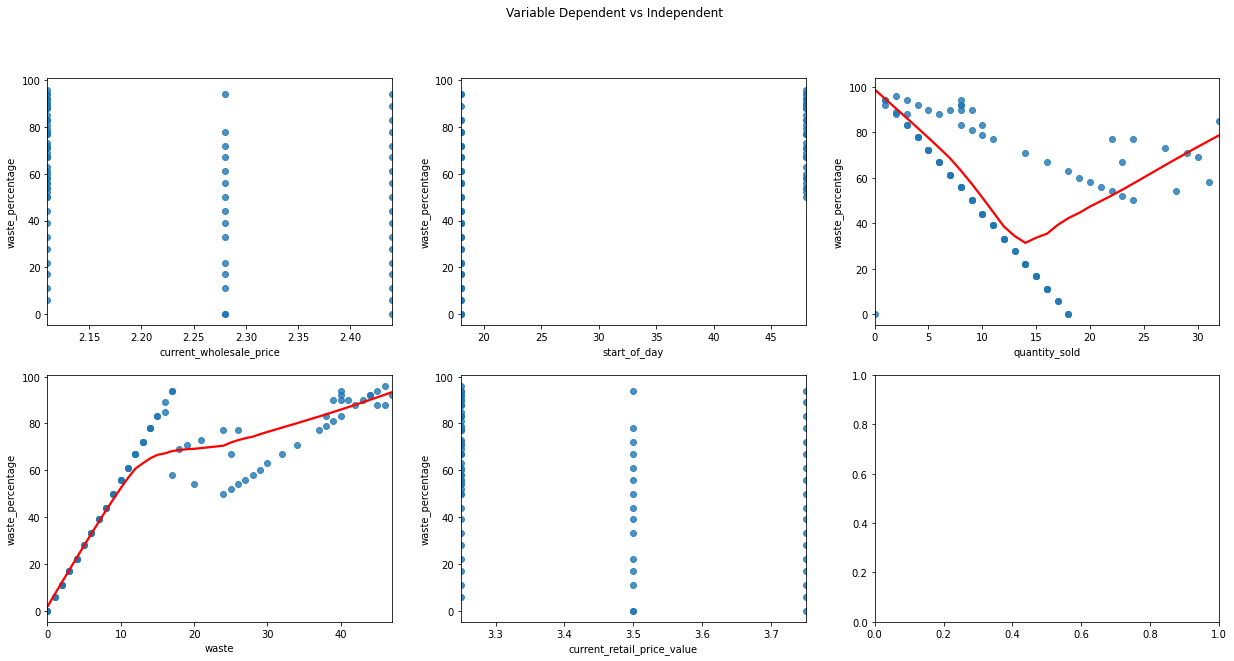

In [50]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(2, 3, figsize=(21, 10))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=data_filter["current_wholesale_price"], y=data_filter["waste_percentage"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,0])
sns.regplot(x=data_filter["start_of_day"], y=data_filter["waste_percentage"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,1])
sns.regplot(x=data_filter["quantity_sold"], y=data_filter["waste_percentage"], lowess=True, line_kws={'color': 'red'}, ax=axes[0,2])
sns.regplot(x=data_filter["waste"], y=data_filter["waste_percentage"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,0])
sns.regplot(x=data_filter["current_retail_price_value"], y=data_filter["waste_percentage"], lowess=True, line_kws={'color': 'red'}, ax=axes[1,1])

plt.show()

####Uji Multikolinearitas


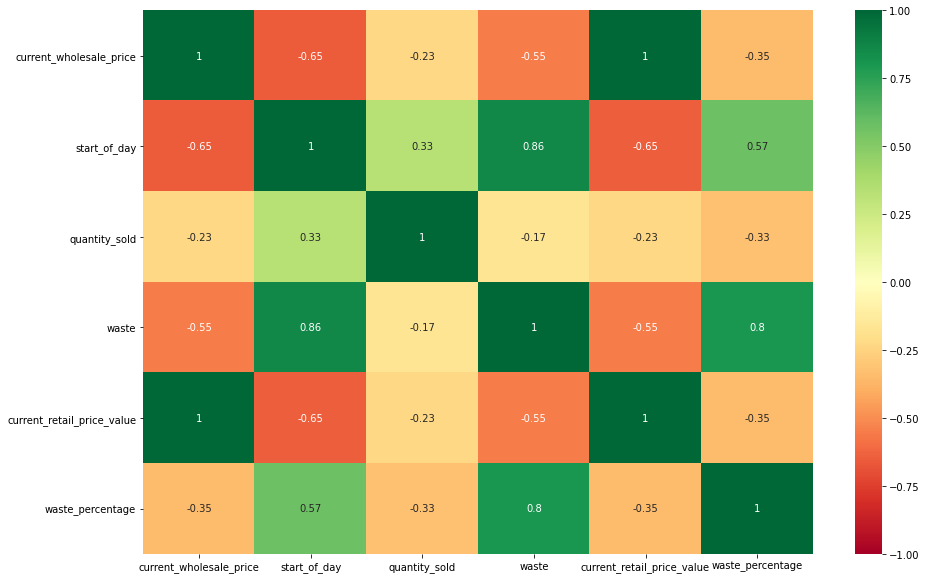

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(data_filter.corr(), vmax=1, vmin=-1, center=0, cmap="RdYlGn", annot=True)

In [49]:
# Cek Urutan korelasi terendah ke tertinggi
data_filter.corr()["waste_percentage"].sort_values()

current_wholesale_price      -0.348818
current_retail_price_value   -0.346165
quantity_sold                -0.327383
start_of_day                  0.574326
waste                         0.798291
waste_percentage              1.000000
Name: waste_percentage, dtype: float64

####Scaling

In [51]:
# Scale data
scaler = StandardScaler()
scaled_data_filter = scaler.fit_transform(data_filter)
scaled_data_filter

array([[ 0.5199653 , -0.87797115, -0.49068835, -0.62766188,  0.49105473,
        -0.1038321 ],
       [-0.74068882, -0.87797115,  0.02742978, -0.90337899, -0.7365821 ,
        -0.94264103],
       [ 1.70646329, -0.87797115, -0.49068835, -0.62766188,  1.71869157,
        -0.1038321 ],
       [-0.74068882,  1.13898959, -0.36115882,  1.37128714, -0.7365821 ,
         0.80791673],
       [ 1.70646329, -0.87797115, -0.36115882, -0.69659116,  1.71869157,
        -0.32265182],
       [ 0.5199653 , -0.87797115, -0.62021788, -0.55873261,  0.49105473,
         0.07851766],
       [-0.74068882, -0.87797115, -0.23162928, -0.76552044, -0.7365821 ,
        -0.54147154],
       [ 1.70646329, -0.87797115, -0.23162928, -0.76552044,  1.71869157,
        -0.54147154],
       [-0.74068882,  1.13898959, -0.23162928,  1.30235786, -0.7365821 ,
         0.73497682],
       [-0.74068882, -0.87797115, -0.87927695, -0.42087405, -0.7365821 ,
         0.47968715],
       [ 1.70646329, -0.87797115, -1.00880649, -0.

In [52]:
# Membuat dataframe dari hasil scalling
scaled_data_filter = pd.DataFrame(scaled_data_filter, columns=data_filter.columns)
scaled_data_filter

,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,waste_percentage
0,0.519965,-0.877971,-0.490688,-0.627662,0.491055,-0.103832
1,-0.740689,-0.877971,0.027430,-0.903379,-0.736582,-0.942641
2,1.706463,-0.877971,-0.490688,-0.627662,1.718692,-0.103832
3,-0.740689,1.138990,-0.361159,1.371287,-0.736582,0.807917
4,1.706463,-0.877971,-0.361159,-0.696591,1.718692,-0.322652
...,...,...,...,...,...,...
80,-0.740689,1.138990,2.488491,-0.145157,-0.736582,-0.030892
81,0.519965,-0.877971,0.545548,-1.179096,0.491055,-1.744980
82,0.519965,-0.877971,-1.397395,-0.145157,0.491055,1.282026
83,1.706463,-0.877971,-1.267866,-0.214086,1.718692,1.099676


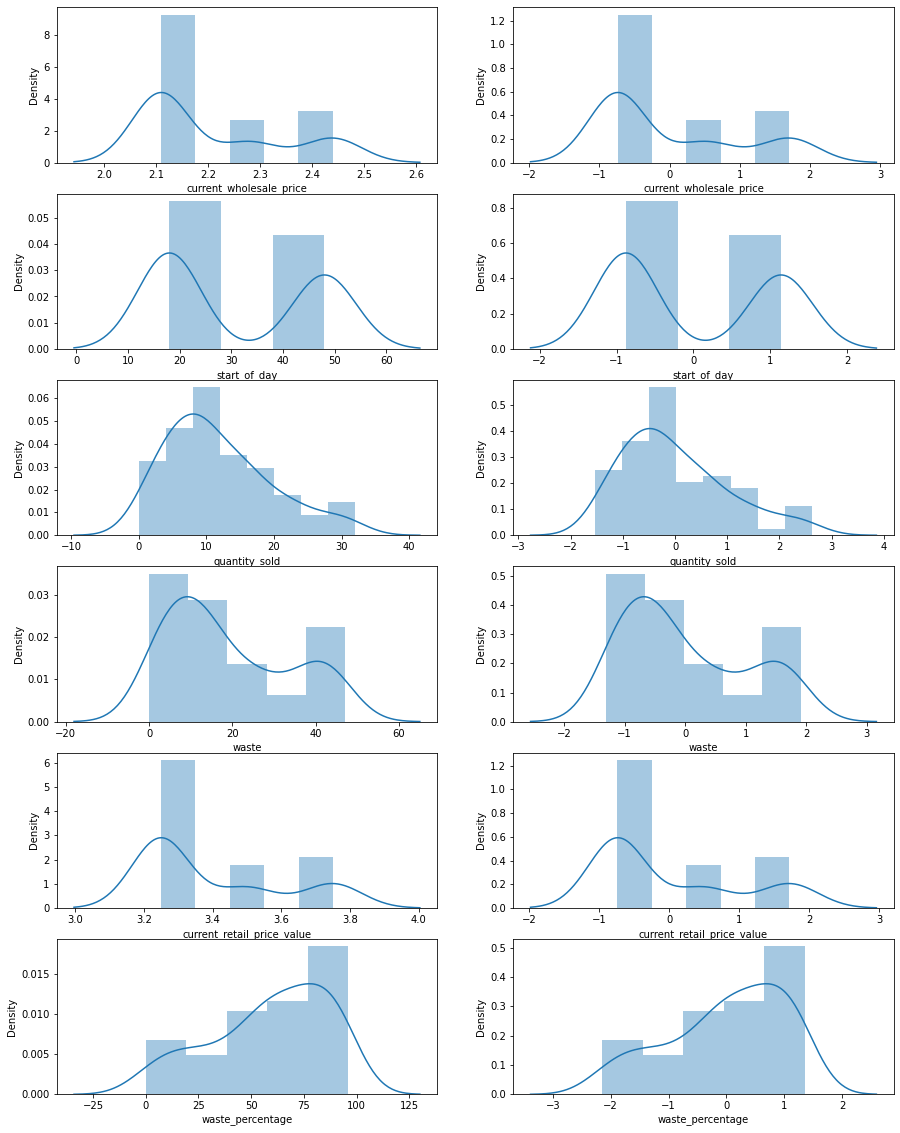

In [53]:
# Plot variabel sebelum dan sesudah scaling
fig, axes = plt.subplots(6, 2, figsize=(15, 20))

sns.distplot(data_filter['current_wholesale_price'], ax=axes[0, 0])
sns.distplot(scaled_data_filter['current_wholesale_price'], ax=axes[0, 1])
sns.distplot(data_filter['start_of_day'], ax=axes[1, 0])
sns.distplot(scaled_data_filter['start_of_day'], ax=axes[1, 1])
sns.distplot(data_filter['quantity_sold'], ax=axes[2, 0])
sns.distplot(scaled_data_filter['quantity_sold'], ax=axes[2, 1])
sns.distplot(data_filter['waste'], ax=axes[3, 0])
sns.distplot(scaled_data_filter['waste'], ax=axes[3, 1])
sns.distplot(data_filter['current_retail_price_value'], ax=axes[4, 0])
sns.distplot(scaled_data_filter['current_retail_price_value'], ax=axes[4, 1])
sns.distplot(data_filter['waste_percentage'], ax=axes[5, 0])
sns.distplot(scaled_data_filter['waste_percentage'], ax=axes[5, 1])
plt.show()

## 3 Membangun Model Regresi

####Train Test Split

In [54]:
X = scaled_data_filter.drop("waste_percentage", axis=1).values
y = scaled_data_filter["waste_percentage"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [55]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  59
Ukuran X test  26
Ukuran y train  59
Ukuran y test  26


### Membangun model dengan package Statsmodels

In [56]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [57]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [58]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     25.33
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           5.94e-13
Time:                        05:42:28   Log-Likelihood:                -48.203
No. Observations:                  59   AIC:                             108.4
Df Residuals:                      53   BIC:                             120.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0339      0.076      0.445      0.6

In [59]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.704988568215673
adjusted coefficient of determination: 0.6771573010662082
regression coefficients: [ 0.03394771 -3.37876781 -1.4053694   0.40652058  2.0503159   3.38815667]


In [60]:
# membuat list
list_columns = []

for i in data_filter.columns:
  if i != "waste_percentage":
    list_columns.append(i)

In [61]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
df_statsmod.head()

,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,actual_price,prediction_price
0,1.706463,-0.877971,-0.490688,-0.627662,1.718692,-0.103832,-0.161105
1,-0.740689,-0.877971,-0.361159,-0.696591,-0.736582,-0.322652,-0.300269
2,-0.740689,-0.877971,0.416018,-1.110167,-0.736582,-1.526160,-0.832291
3,1.706463,-0.877971,-0.102100,-0.834450,1.718692,-0.723821,-0.427117
4,-0.740689,1.138990,-0.490688,1.440216,-0.736582,0.880857,1.193630


####Uji Residual Distribusi Normal

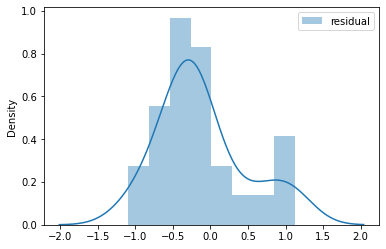

In [62]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [63]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,current_wholesale_price,start_of_day,quantity_sold,waste,current_retail_price_value,actual_price,prediction_price,residual
0,1.706463,-0.877971,-0.490688,-0.627662,1.718692,-0.103832,-0.161105,0.057273
1,-0.740689,-0.877971,-0.361159,-0.696591,-0.736582,-0.322652,-0.300269,-0.022383
2,-0.740689,-0.877971,0.416018,-1.110167,-0.736582,-1.526160,-0.832291,-0.693869
3,1.706463,-0.877971,-0.102100,-0.834450,1.718692,-0.723821,-0.427117,-0.296705
4,-0.740689,1.138990,-0.490688,1.440216,-0.736582,0.880857,1.193630,-0.312774


<function matplotlib.pyplot.show>

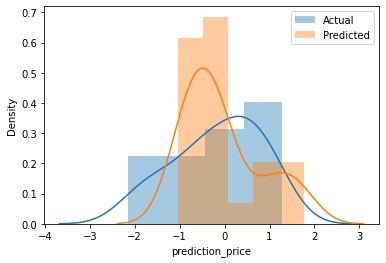

In [64]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show

####Uji No autokorelasi


Uji Durbin watson akan menghasilkan nilai Durbin Watson (DW) yang nantinya akan dibandingkan dengan dua (2) nilai Durbin Watson Tabel, yaitu Durbin Upper (DU) dan Durbin Lower DL). Dikatakan tidak terdapat autokorelasi jika nilai DW > DU dan (4-DW) > DU atau bisa dinotasikan juga sebagai berikut: (4-DW) > DU < DW.


In [65]:
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

1.8034202968202773

####Uji Homoskedastisitas

Uji Homoskedastisiitas untuk melihat apakah terdapat ketidaksamaan varians dari residual satu ke pengamatan ke pengamatan yang lain.


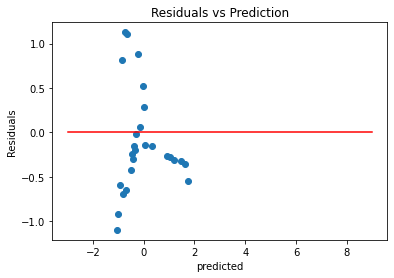

In [66]:
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot([-3,9],[0,0],color='red')
asm_homosk = plt.title('Residuals vs Prediction')

#### Evaluasi Model

In [67]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_price'], df_statsmod['prediction_price']))

R-square : 0.6318444756672796


In [68]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 0.34013745552697733


### Uji Partial & Serentak Analisis Regresi

Uji Parameter T-test  memiliki tujuan, apakah variabel independent(X) memberikan pengaruh secara partial terhadap variabel dependent (Y)

In [69]:
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)

T-test score const:  0.44520068071488395
T-test score X1:  -0.5978636692681696
T-test score X2:  -2.745733387497469
T-test score X3:  1.5586773682053818
T-test score X4:  4.167954386394669
T-test score X5:  0.6017183754174622


In [70]:
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)

P-value const:  0.6579878283811762
P-value X1:  0.5524771214820344
P-value X2:  0.008227001824747412
P-value X3:  0.1250246515669443
P-value X4:  0.00011409612779498468
P-value X5:  0.5499270101306658


Uji kelayakan model F-test memilki tujuan, apakah model yang dibentuk layak digunakan atau tidak

In [71]:
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  25.330811005823353
P-value :  5.944137156280609e-13
Tolak H0


Dari output diatas, diperoleh p-value kurang dari 0,05 sehingga hypothesis null (H0) ditolak dan dapat disimpulkan bahwa model regresi dari kelima variabel independen dan variabel dependen waste_percentage (Y) layak digunakan.